Student Number: GH1043274

Student Name: Carl Jhon D. Odicta

Assessment Title: Gisma Airline's Passengers Satisfaction - Classification Model

Module Code: M505B

Module Title: Intro to AI and Machine Learning

Module Tutor: Prof. Reza Babaei

Date Submitted: September 25, 2025

# **Gisma Airline's Passengers Satisfaction - Classification Model**

# **I. Business Context**

**I.i. Business Scenario**

Since the travel restrictions due to the COVID-19 Pandemic were loosened in 2022, experts predicted a global passenger demand recovery to pre-pandemic (2019) levels in approximately 2.4 years, i.e. by late 2022 (Gudmundsson SV. et al, 2020). However, actual recovery exceeded those expectations - by the end of 2023, domestic traffic globally had not only returned to but surpassed 2019 levels by about 3.9%, and total traffic in Q4 of 2023 was at around 98% of 2019 levels (IATA.org, 2024)

In order to take advantage of this incoming surge of passengers, An anonimous airline (Let's say "Gisma Air") hired you to improve their passengers' satisfaction rate. As a data scientist, you will try to help Gisma Air achieve this goal by doing what you do best, analyzing their available data and recommend data-backed and actionable business insights.

**I.i. Statement of the Problem**

Understand key factors driving passenger satisfaction in order to provide data-backed and actionable recommendations.

**I.ii. Machine Learning Task**

1. Build a classification model to predict passenger satisfaction based on flight, service, and customer features.

2. From the model, identify the most influential drivers of satisfaction.

# **II. Data Collection**

**II.i. Data Source**

The **Airline Customer Satisfaction** Dataset from Kaggle will be used in this exercise.

"This dataset provides insights into customer satisfaction levels within an undisclosed airline company. While the specific airline name is withheld, the dataset is rich in information, containing 22 columns and 129,880 rows. It aims to predict whether future customers will be satisfied based on various parameters included in the dataset."

Link: https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction/data

**II.ii. Features List**

Here are the list of features and it's definition as stated in the website.

1. Satisfaction -	Indicates the satisfaction level of the customer.
2. Customer Type - 'Loyal Customer' or 'Disloyal Customer’.
3. Age -	Age of the customer.
4. Type of Travel	- 'Business travel' or 'Personal Travel’.
5. Class	- 'Business', 'Eco', or 'Eco Plus’.
6. Flight Distance	- The distance of the flight in kilometers
7. Seat comfort	- Rating of seat comfort provided during the flight (1 to 5).
8. Departure/Arrival time convenient - Rating of the convenience of departure/arrival time (1 to 5).
9. Food and drink	- Rating of food and drink quality provided during the flight (1 to 5).
10. Gate location	- Rating of gate location convenience (1 to 5).
11. Inflight wifi service	- Rating of inflight wifi service satisfaction (1 to 5).
12. Inflight entertainment - Rating of inflight entertainment satisfaction (1 to 5).
13. Online support - Rating of online customer support satisfaction (1 to 5).
14. Ease of Online booking - Rating of ease of online booking satisfaction (1 to 5).
15. On-board service - Rating of on-board service satisfaction (1 to 5).
16. Leg room service - Rating of leg room service satisfaction (1 to 5).
17. Baggage handling - Rating of baggage handling satisfaction (1 to 5).
18. Checkin service - Rating of check-in service satisfaction (1 to 5).
19. Cleanliness	- Rating of cleanliness satisfaction (1 to 5).
20. Online boarding	- Rating of online boarding satisfaction (1 to 5).
21. Departure Delay in Minutes -	Total departure delay in minutes.
22. Arrival Delay in Minutes -	Total arrival delay in minutes.

# **III. Data Pre-Processing**

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv("/content/Airline Customer Satisfaction.csv")

In [4]:
# Basic Info
print(df.shape)
#df.info()
#df.head() *in comment since display takes space

(129880, 22)


Original data has 129880 rows and 22 columns (features)

**III.i. Inconsistent Formats**

In [5]:
# Check for Inconsistent Formats
def check_inconsistent_formats(df):
    print("===== Checking Inconsistent Formats =====\n")

    # Numeric columns: Check for non-numeric values
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in numeric_cols:
        non_numeric = df[col].apply(lambda x: isinstance(x, (int,float))==False)
        if non_numeric.any():
            print(f"[Numeric Issue] Column '{col}' has non-numeric values:")
            print(df[col][non_numeric].unique(), "\n")

    # Categorical columns: Show all unique values
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        unique_values = df[col].unique()
        print(f"Column '{col}' unique values:")
        print(unique_values, "\n")

    # Check for spaces in strings
    for col in object_cols:
        if df[col].astype(str).str.contains(r'^\s|\s$').any():
            print(f"[Whitespace Issue] Column '{col}' has spaces\n")

    print("===== Format Check Complete =====\n")

check_inconsistent_formats(df)

===== Checking Inconsistent Formats =====

Column 'Satisfaction' unique values:
['Satisfied' 'Dissatisfied'] 

Column 'Customer Type' unique values:
['Loyal Customer' 'Disloyal Customer'] 

Column 'Type of Travel' unique values:
['Personal Travel' 'Business Travel'] 

Column 'Class' unique values:
['Eco' 'Business' 'Eco Plus'] 

===== Format Check Complete =====



Formats are consistent: No problem with datatypes and spaces

**III.ii. Missing Values**

In [6]:
# Missing Values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

  #Drop rows with missing values
df_clean = df.dropna()

print(df_clean.shape)

Arrival Delay in Minutes    393
dtype: int64
(129487, 22)


Detected 393 missig values under "Arrival Delay in Minutes" column. Since that count is negligible you can just drop those rows.

**III.iii. Duplicates**

In [7]:
# Duplicates
duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


No duplicated rows

**III.iv. Outliers**

In [8]:
# Outliers
numeric_cols_to_cap = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

  # Outlier detection and capping using IQR
for col in numeric_cols_to_cap:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

    # Cap outliers
    df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
    df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound

print("Outliers capped successfully.")


Age: 0 outliers
Flight Distance: 2575 outliers
Departure Delay in Minutes: 17970 outliers
Arrival Delay in Minutes: 17492 outliers
Outliers capped successfully.


Outliers for the numeric variables were detected using Inter-quartile Ratio (IQR). Detected outliers were capped (changed equal to lower/upper bound).

Outliers are needed to be addressed because classification models are sensitive to outliers. You decided to cap outliers instead of removing them because they are significantly many of them and deleting them may result to information loss.

**III.v. Imbalance**

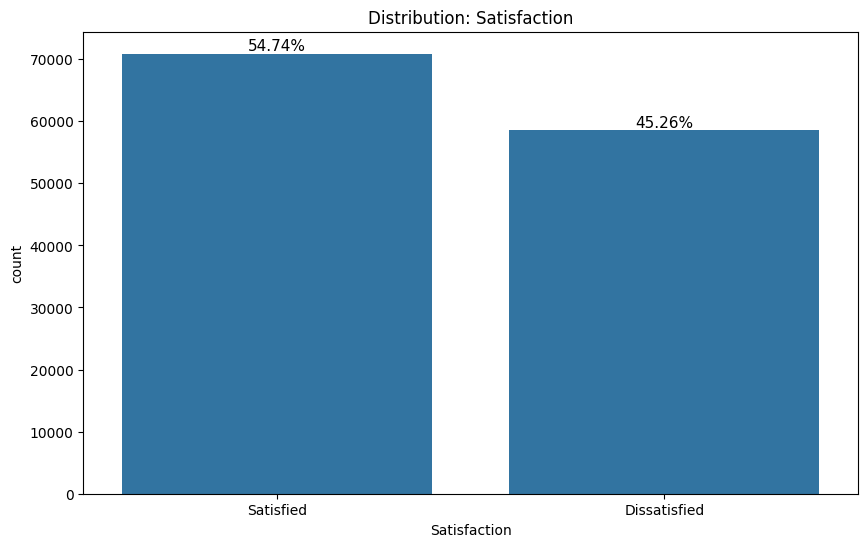

In [9]:
# Imbalance
percentages = round(df_clean['Satisfaction'].value_counts(normalize=True) * 100, 2)

plt.figure(figsize=(10,6))
ax = sns.countplot(x='Satisfaction', data=df_clean)

total = len(df_clean)
for p in ax.patches:
    count = p.get_height()
    percentage = count / total * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., count),
                ha='center', va='bottom', fontsize=11)

plt.title(f"Distribution: Satisfaction")
plt.show()


Your Target Variable, satisfaction is not imbalanced. So you don't need to perform oversampling.

# **IV. Features**

**IV.i. Feature Engineering**

In [10]:
#Feature Engineering
df_feat = df_clean.copy()

  # Total Delay in Minutes
df_feat['Total_Delay'] = df_feat['Departure Delay in Minutes'] + df_feat['Arrival Delay in Minutes']

  # Long Delay Flag (>60 min) & Any Delay Flag (>0 min)
df_feat['Long_Delay_Flag'] = (df_feat['Total_Delay'] > 60).astype(int)
df_feat['Any_Delay_Flag'] = (df_feat['Total_Delay'] > 0).astype(int)

  # Age Groups
age_bins = [0, 12, 17, 35, 64, 200]
age_labels = ['Children','Teenagers','Young Adults','Working Adults','Seniors']
df_feat['Age_Group'] = pd.cut(df_feat['Age'], bins=age_bins, labels=age_labels)

  # Flight Categories
bins = [-1, 482, 3701, df_feat['Flight Distance'].max()+1]
labels = ['Short_Haul','Medium_Haul','Long_Haul']
df_feat['Flight_Cat'] = pd.cut(df_feat['Flight Distance'], bins=bins, labels=labels)

  # Loyalty-Class Interaction
df_feat['Loyalty_Class'] = df_feat['Customer Type'] + "__" + df_feat['Class']

  # Flight Distance-Total Delay Interaction
df_feat['Dist_Delay'] = df_feat['Flight Distance'] * df_feat['Total_Delay']

df_feat was created to add the following features:


*   Total Delay - Departure Delay + Arrival Delay. Passengers usually perceive overall delay.
*   Long Delay - Value of 1 when Total Delay is more than 60 minutes
*   Any Delay - Value of 1 when Total Delay is more than 1 minute (indicator if the flight is delayed or not)
*   Age Groups - Passenger behavior changes depending on age groups (Mckinsey.com, 2024)
*   Flight Categories - Short/medium/long haul passengers may have different flight expectations. This is also comparable to domestic/international satisfaction.
*   Loyal-Class Interaction - String Interaction. A loyal business passenger might tolerate issues more than a disloyal eco passenger.
*   Flight Distance-Total Delay Interaction - Numeric Interaction. Reactions to delay might be different depending on flight distance, i.e. "A delay might not matter as much if the flight is long anyways".

**IV.ii. Binary Encoding**

In [11]:
#Encode Binary Variables
df_feat['Satisfaction'] = df_feat['Satisfaction'].map({'Satisfied': 1, 'Dissatisfied': 0})
df_feat['Customer Type'] = df_feat['Customer Type'].map({'Loyal Customer': 1, 'Disloyal Customer': 0})
df_feat['Type of Travel'] = df_feat['Type of Travel'].map({'Business Travel': 1, 'Personal Travel': 0})

You encode binary variables prior splitting since it is generally safer and easier to do so.

**IV.iii. Variable Transformation**

In [12]:
# Variable Transformation

  #Checking for Skewness
numeric_cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total_Delay', 'Dist_Delay']
skewness = df_feat[numeric_cols].skew()
vars_to_transform = skewness[abs(skewness) > 1].index.tolist()

  #Log-Transform
for col in vars_to_transform:
    df_feat[col+'_log'] = np.log1p(df_feat[col])

print('Variables with high Skewness:')
print(vars_to_transform)
print('Applying Log Transformation')

Variables with high Skewness:
['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Total_Delay', 'Dist_Delay']
Applying Log Transformation


You apply logarithmic transformation to your skewed continuous variables (skewness > 1).

**IV.ii. Train/Test Split**

In [13]:
from sklearn.model_selection import train_test_split

# Define Features and Target
target_col = 'Satisfaction'
X = df_feat.drop(columns=[target_col])
y = df_feat[target_col]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quick check
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution (train):\n", y_train.value_counts(normalize=True))
print("Target distribution (test):\n", y_test.value_counts(normalize=True))


Training set shape: (103589, 32)
Test set shape: (25898, 32)
Target distribution (train):
 Satisfaction
1    0.548369
0    0.451631
Name: proportion, dtype: float64
Target distribution (test):
 Satisfaction
1    0.543555
0    0.456445
Name: proportion, dtype: float64


You split df_feat into train and test datasets. You do this at this stage (prior to scaling and one-hot encoding) to avoid data leakage.

**IV.iii. Feature Transformation**

In [14]:
#Feature Transformation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

  #Scaling and One-Hot Encoding
numeric_features_to_scale = ['Age', 'Flight Distance', 'Departure Delay in Minutes_log', 'Arrival Delay in Minutes_log', 'Total_Delay_log', 'Dist_Delay_log']
categorical_features = ['Class', 'Age_Group', 'Flight_Cat', 'Loyalty_Class']

preprocessor = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), numeric_features_to_scale),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

  # Fit and transform
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

  # Feature names

feature_names = numeric_features_to_scale.copy()

cat_ohe = preprocessor.named_transformers_['cat']
cat_names = cat_ohe.get_feature_names_out(categorical_features)
feature_names.extend(cat_names)

passthrough_features = [col for col in X_train.columns
                        if col not in numeric_features_to_scale + categorical_features]
feature_names.extend(passthrough_features)

feature_names = np.array(feature_names)

You apply one-hot encoding to your categorical variables with more than 2 groups

You apply scaling to your continuous variables to ensure that these features have comparable ranges, which could is essential to distance-based models.

**IV.iv. Feature Selection**

In [15]:
#Low Variance Features
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)

X_train_var = var_thresh.fit_transform(X_train_transformed)
X_test_var = var_thresh.transform(X_test_transformed)

  # Keep track of which features remain
def get_feature_names(preprocessor):
    feature_names = []

    # Numeric features
    if 'num_scale' in dict(preprocessor.named_transformers_):
        feature_names.extend(numeric_features_to_scale)

    # Categorical features after one-hot
    if 'cat' in dict(preprocessor.named_transformers_):
        cat_ohe = preprocessor.named_transformers_['cat']
        cat_names = cat_ohe.get_feature_names_out(categorical_features)
        feature_names.extend(cat_names)

    # Passthrough features (if any)
    if preprocessor.remainder == 'passthrough':
        passthrough_features = [col for col in X_train.columns
    if col not in numeric_features_to_scale + categorical_features]
        feature_names.extend(passthrough_features)


    return np.array(feature_names)

feature_names = get_feature_names(preprocessor)
feature_names_var = feature_names[var_thresh.get_support()]

removed_features = feature_names[~var_thresh.get_support()]
print("Features removed due to low variance:", removed_features)


Features removed due to low variance: ['Loyalty_Class_Disloyal Customer__Eco Plus']


The dummy variable 'Loyalty_Class_Disloyal Customer_Eco Plus' shows as having <0.01 variance, meaning that's its values doesn't change much across samples, and would not contribute to your classification models. This feature will be dropped.

In [16]:
# Correlation Analysis

  # Get numeric features after scaling/logging (you defined them earlier)
numeric_idx = [i for i, f in enumerate(feature_names_var) if f in numeric_features_to_scale or '_log' in f]
numeric_data = pd.DataFrame(X_train_var[:, numeric_idx], columns=feature_names_var[numeric_idx])

  # Correlation matrix
corr_matrix = numeric_data.corr().abs()

  # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

  # Find highly correlated features
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

  # Drop correlated features
numeric_idx_to_keep = [i for i, f in enumerate(feature_names_var) if f not in to_drop]
X_train_final = X_train_var[:, numeric_idx_to_keep]
X_test_final = X_test_var[:, numeric_idx_to_keep]

feature_names_final = feature_names_var[numeric_idx_to_keep]

Highly correlated features to drop: ['Total_Delay_log', 'Dist_Delay_log']


From the correlation matrix, it shows that 'Total_Delay_log' and 'Dist_Delay_log' are highly correlated. So you are dropping 'Dis_Delay_log' and keep 'Total_Delay_log'.

**IV.iv. Dimension Reduction** optional

Also, we will not use Dimension Reduction Techqnique, specifically Principal Components Analysys (PCA) because of the following reasons:
1. Features are not very many
2. Most features are not numeric
3. PCA sacrifices interpretability for predictive power, and given our business problem, iinterpretability is an important advantage to have for a model

# **V. Classification Models**

This section is divided into each classification models. For clarity, you included the model training, hyperparameter tuning, cross validation, prediction, evaluation metrics, and interpretation here together.

**V.i. Logistic Regression**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1'}
LOGISTIC REGRESSION RESULTS (TUNED)
------------------------------------
Accuracy: 0.8303343887558885

Confusion Matrix:
 [[ 9572  2249]
 [ 2145 11932]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81     11821
           1       0.84      0.85      0.84     14077

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

ROC-AUC Score: 0.9044289664846654


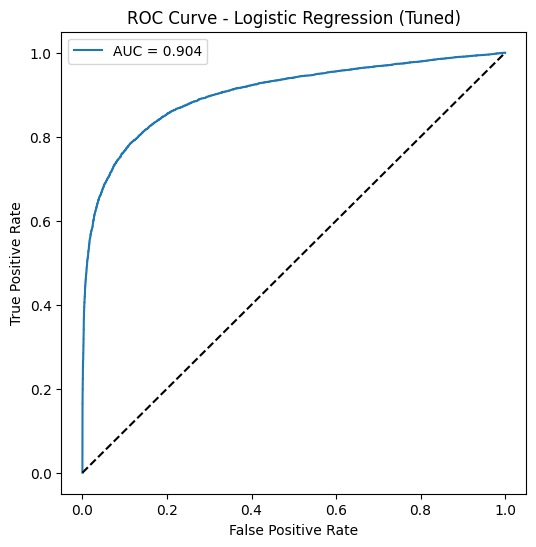

Top features increasing satisfaction:
                                    Feature  Coefficient  Odds_Ratio
15  Loyalty_Class_Loyal Customer__Eco Plus     1.171072    3.225448
16                           Customer Type     0.958111    2.606769
17                          Type of Travel     0.737456    2.090609
23                  Inflight entertainment     0.709303    2.032574
13  Loyalty_Class_Loyal Customer__Business     0.708837    2.031626

Top features decreasing satisfaction:
                                  Feature  Coefficient  Odds_Ratio
5                         Class_Eco Plus    -1.137287    0.320688
12  Loyalty_Class_Disloyal Customer__Eco    -0.967770    0.379929
19     Departure/Arrival time convenient    -0.220519    0.802102
3           Arrival Delay in Minutes_log    -0.214864    0.806651
10                Flight_Cat_Medium_Haul    -0.199824    0.818875
Optimization terminated successfully.
         Current function value: 0.396117
         Iterations 9
               

In [16]:
# LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm

  # Preparation
X_train_df = pd.DataFrame(X_train_final, columns=feature_names_final).reset_index(drop=True)
X_test_df  = pd.DataFrame(X_test_final, columns=feature_names_final).reset_index(drop=True)
y_train_reset = y_train.reset_index(drop=True)
y_test_reset  = y_test.reset_index(drop=True)

  # Model Training
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
param_grid = {
    'penalty': ['l1', 'l2'],       # L1 and L2 regularization
    'C': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

  # Hyper-parameter Tuning - Grid Search
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train_df, y_train_reset)

print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

  # Predictions
y_pred = best_model.predict(X_test_df)
y_pred_proba = best_model.predict_proba(X_test_df)[:, 1]

  # Evaluation Metrics
print("LOGISTIC REGRESSION RESULTS (TUNED)")
print("------------------------------------")
print("Accuracy:", accuracy_score(y_test_reset, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_reset, y_pred))
print("\nClassification Report:\n", classification_report(y_test_reset, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_reset, y_pred_proba))

  # ROC curve
fpr, tpr, _ = roc_curve(y_test_reset, y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_reset, y_pred_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression (Tuned)")
plt.legend()
plt.show()

  # Feature Importance (Odds Ratio)
coef_df = pd.DataFrame({
    'Feature': feature_names_final,
    'Coefficient': best_model.coef_[0],
    'Odds_Ratio': np.exp(best_model.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

top_inc = coef_df.nlargest(5, 'Odds_Ratio')
top_dec = coef_df.nsmallest(5, 'Odds_Ratio')

print("Top features increasing satisfaction:\n", top_inc)
print("\nTop features decreasing satisfaction:\n", top_dec)

  # Regression Model Summary

X_train_sm = sm.add_constant(X_train_df)
logreg_sm_model = sm.Logit(y_train_reset, X_train_sm).fit()
print(logreg_sm_model.summary())

By nature of the business problem, particularly with the target variable being binary, Linear regression model would not make much sense in this case. Therefore, Logistic Regression is more appropriate.



The Logistic Regression Model, tunied with L1 regularization (Lasso), shows a strong predictive ability for passenger satisfaction:
*   Accuracy: 83.03%
*   ROC-AUC: 0.90
*   Precision & Recall: Balanced across both classes which means that the model performs equally well in detecting satisfied and dissatisfied passengers.

**V.iii. Naive Bayes**

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'var_smoothing': np.float64(2.1544346900318868e-11)}
NAIVE BAYES RESULTS (TUNED)
----------------------------
Accuracy: 0.8059309599196849
ROC-AUC Score: 0.8911505529934978

Confusion Matrix:
 [[ 9031  2790]
 [ 2236 11841]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78     11821
           1       0.81      0.84      0.82     14077

    accuracy                           0.81     25898
   macro avg       0.81      0.80      0.80     25898
weighted avg       0.81      0.81      0.81     25898



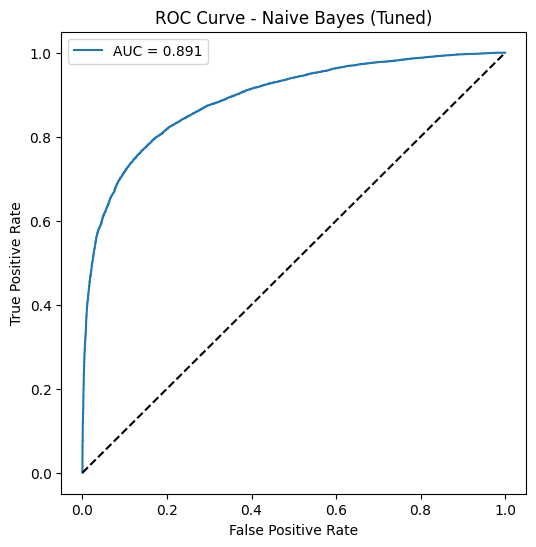

In [17]:
# NAIVE BAYES MODEL
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

  # Preparation
X_train_nb = X_train_final
X_test_nb  = X_test_final
y_train_nb = y_train.reset_index(drop=True)
y_test_nb  = y_test.reset_index(drop=True)

  # Hyperparameter Tuning (var_smoothing)
param_grid = {'var_smoothing': np.logspace(-12, -6, 10)}

gnb = GaussianNB()
grid_nb = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_nb.fit(X_train_nb, y_train_nb)

print("Best Hyperparameters:", grid_nb.best_params_)

  # Model Training
nb_model = GaussianNB(var_smoothing=grid_nb.best_params_['var_smoothing'])
nb_model.fit(X_train_nb, y_train_nb)

  # Predictions
nb_y_pred = nb_model.predict(X_test_nb)
nb_y_pred_proba = nb_model.predict_proba(X_test_nb)[:, 1]  # probability for positive class


  # Evaluation Metrics
print("NAIVE BAYES RESULTS (TUNED)")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test_nb, nb_y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_nb, nb_y_pred_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_nb, nb_y_pred))
print("\nClassification Report:\n", classification_report(y_test_nb, nb_y_pred))

    # ROC Curve
fpr, tpr, _ = roc_curve(y_test_nb, nb_y_pred_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_nb, nb_y_pred_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bayes (Tuned)")
plt.legend()
plt.show()

The Naive Bayes Model, tuned with Variable Smoothing, results to the following evaluation metrics values:
*   Accuracy: 80.60%
*   ROC-AUC: 0.89
*   Precision & Recall: The model slightly over-predicts satisfaction (FP>FN).

**V.iv. Support Vector Machines (SVM)**

Tuning on subset: 20717 rows (20% of training)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters (LinearSVC): {'loss': 'squared_hinge', 'C': np.float64(7.742636826811277)}

LINEARSVC RESULTS (OPTIMIZED - FIXED)
--------------------------------------
Accuracy: 0.8168970576878524
ROC-AUC Score: 0.8884756207830959

Confusion Matrix:
 [[ 9213  2608]
 [ 2134 11943]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80     11821
           1       0.82      0.85      0.83     14077

    accuracy                           0.82     25898
   macro avg       0.82      0.81      0.81     25898
weighted avg       0.82      0.82      0.82     25898



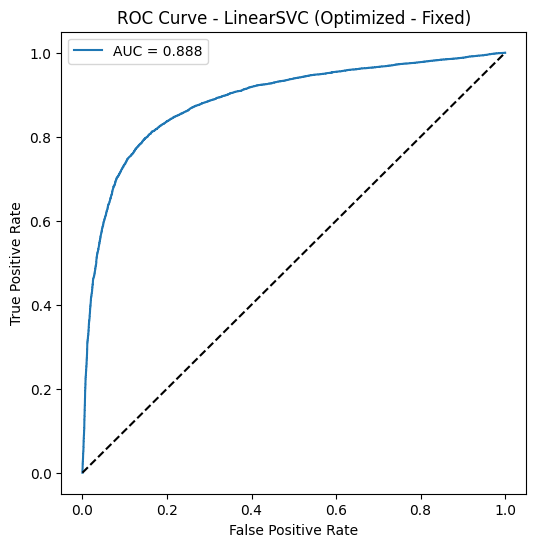

In [18]:
#SUPPORT VECTOR MACHINES (SVM) MODEL
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

  # Preparation
X_train_svc = X_train_final
X_test_svc  = X_test_final
y_train_svc = y_train.reset_index(drop=True)
y_test_svc  = y_test.reset_index(drop=True)

  # Hyperparameter Tuning
subset_frac = 0.20
X_sub, _, y_sub, _ = train_test_split(
    X_train_svc, y_train_svc,
    train_size=subset_frac,
    stratify=y_train_svc,
    random_state=42
)
print(f"Tuning on subset: {X_sub.shape[0]} rows ({subset_frac*100:.0f}% of training)")

lsvc = LinearSVC(max_iter=5000, dual=False, random_state=42)

param_dist = {
    'C': np.logspace(-3, 2, 10),
    'loss': ['squared_hinge']
}

rand_search = RandomizedSearchCV(
    estimator=lsvc,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rand_search.fit(X_sub, y_sub)
print("Best hyperparameters (LinearSVC):", rand_search.best_params_)

  # Model Training
best_lsvc = LinearSVC(**rand_search.best_params_, max_iter=5000, dual=False, random_state=42)
calibrated_lsvc = CalibratedClassifierCV(best_lsvc, cv=3)
calibrated_lsvc.fit(X_train_svc, y_train_svc)

  # Predictions
y_pred = calibrated_lsvc.predict(X_test_svc)
y_proba = calibrated_lsvc.predict_proba(X_test_svc)[:, 1]

  # Evaluation Metrics
print("\nLINEARSVC RESULTS (OPTIMIZED - FIXED)")
print("--------------------------------------")
print("Accuracy:", accuracy_score(y_test_svc, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_svc, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_svc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_svc, y_pred))

    # ROC Curve
fpr, tpr, _ = roc_curve(y_test_svc, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_svc, y_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LinearSVC (Optimized - Fixed)")
plt.legend()
plt.show()


The Support Vector Machine (SVM) Model used only linear SVC - non-linear relationships can not be captured but some were explained by the engineered interaction features. The model evaluation metrics results as follows:
*   Accuracy: 81.69%
*   ROC-AUC: 0.89
*   Precision & Recall: The model slightly favors predicting satisfaction..

note: Model can be improved when using RDF SVM instead of linear. Also by tuning using entire train set and set probability = True. Unfortunately, unable to do due to time constraints.

**V.v. K-Nearest Neighbors (KNN)**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN hyperparameters (KDTree): {'algorithm': 'kd_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
KNN RESULTS (KDTree)
--------------------
Accuracy: 0.7828017607537262

Confusion Matrix:
 [[ 8975  2846]
 [ 2779 11298]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     11821
           1       0.80      0.80      0.80     14077

    accuracy                           0.78     25898
   macro avg       0.78      0.78      0.78     25898
weighted avg       0.78      0.78      0.78     25898

ROC-AUC Score: 0.8828484707211477


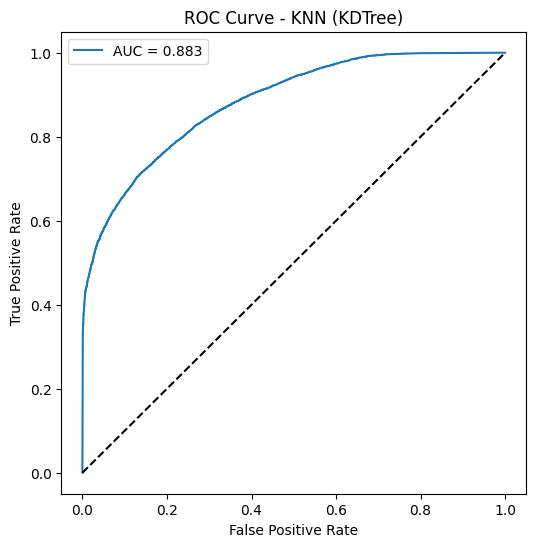

In [19]:
# K-NEAREST NEIGHBORS (KNN) MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

  # Preparation
knn_X_train = X_train_final
knn_X_test  = X_test_final
knn_y_train = y_train.reset_index(drop=True)
knn_y_test  = y_test.reset_index(drop=True)

  # Hyperparameter Tuning - KDTree (Tuning using subset only to speed-up run-time)
sample_frac = 0.2
X_sub, _, y_sub, _ = train_test_split(
    knn_X_train, knn_y_train,
    train_size=sample_frac,
    stratify=knn_y_train,
    random_state=42
)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],              # Manhattan or Euclidean
    'algorithm': ['kd_tree']   # only KDTree
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_sub, y_sub)
print("Best KNN hyperparameters (KDTree):", grid_knn.best_params_)

  # Model Training - KDTree
best_knn = grid_knn.best_estimator_
best_knn.fit(knn_X_train, knn_y_train)

  # Prediction
y_pred = best_knn.predict(knn_X_test)
y_proba = best_knn.predict_proba(knn_X_test)[:, 1]

  # Evaluation Metrics
print("KNN RESULTS (KDTree)")
print("--------------------")
print("Accuracy:", accuracy_score(knn_y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(knn_y_test, y_pred))
print("\nClassification Report:\n", classification_report(knn_y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(knn_y_test, y_proba))

    # ROC Curve
fpr, tpr, _ = roc_curve(knn_y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(knn_y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN (KDTree)")
plt.legend()
plt.show()


The K-Nearest Neighbors (KNN) Model, using only KTree Algorithm - to speed up nearest neighbors searches:
*   Accuracy: 78.28%
*   ROC-AUC: 0.88
*   Precision & Recall: Model is slightly better at predicting satisfied passengers, but both type of errors (FP, FN) are almost equal.

note: Model can still be improved when tuned using entire train set and bigger gridsearch. Can also, run other KNN algorithms (besides KDTree) for comparison.


**V.vi. Decision Tree**

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Decision Tree hyperparameters (fast): {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 20}

DECISION TREE RESULTS (FAST)
----------------------------
Accuracy: 0.9322341493551626

Confusion Matrix:
 [[11018   803]
 [  952 13125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     11821
           1       0.94      0.93      0.94     14077

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898

ROC-AUC Score: 0.9833065558669104


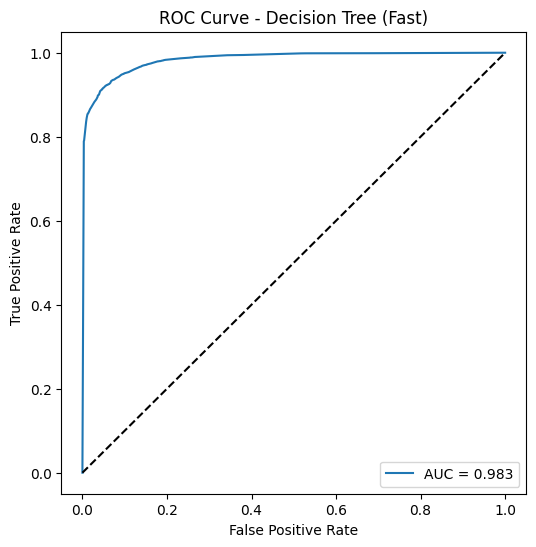


Top 10 features (impurity-based):
                                   feature  importance
23                  Inflight entertainment    0.465397
18                            Seat comfort    0.213805
25                  Ease of Online booking    0.092437
13  Loyalty_Class_Loyal Customer__Business    0.033126
17                          Type of Travel    0.024498
21                           Gate location    0.020005
19       Departure/Arrival time convenient    0.019525
29                         Checkin service    0.019017
24                          Online support    0.016912
20                          Food and drink    0.016541


<Figure size 800x500 with 0 Axes>

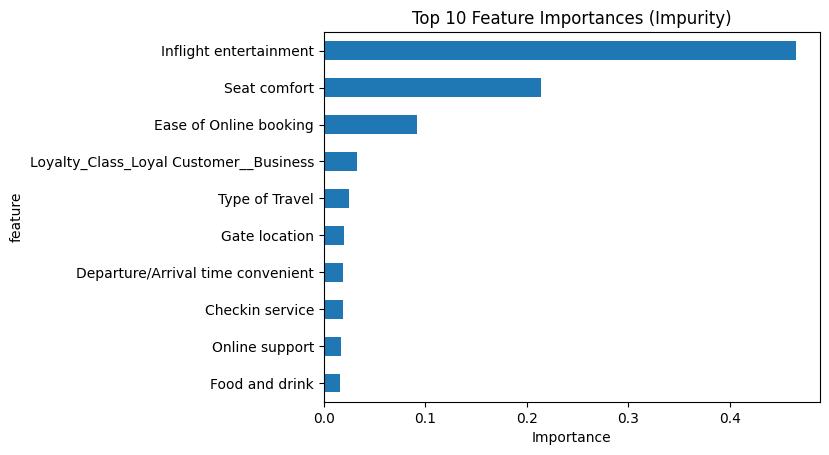

In [20]:
# DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.inspection import permutation_importance

  # Preparation
dt_X_train, dt_X_test = X_train_final, X_test_final
dt_y_train, dt_y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

  # Model Training and Hyperparameter Tuning (Reduced grid for speed)
param_grid_fast = {
    'criterion': ['gini'],
    'max_depth': [5, 8, 12],
    'min_samples_leaf': [5, 20, 50],
    'max_features': ['sqrt', None]
}

dt_fast = DecisionTreeClassifier(random_state=42)

grid_dt_fast = GridSearchCV(
    estimator=dt_fast,
    param_grid=param_grid_fast,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
grid_dt_fast.fit(dt_X_train, dt_y_train)

best_dt_fast = grid_dt_fast.best_estimator_
print("Best Decision Tree hyperparameters (fast):", grid_dt_fast.best_params_)

  # Predictions
y_pred = best_dt_fast.predict(dt_X_test)
y_proba = best_dt_fast.predict_proba(dt_X_test)[:, 1]

  # Evaluation Metrics
print("\nDECISION TREE RESULTS (FAST)")
print("----------------------------")
print("Accuracy:", accuracy_score(dt_y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(dt_y_test, y_pred))
print("\nClassification Report:\n", classification_report(dt_y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(dt_y_test, y_proba))

   # ROC Curve
fpr, tpr, _ = roc_curve(dt_y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(dt_y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree (Fast)")
plt.legend()
plt.show()

  # Optional: Top Features
fi = pd.DataFrame({
    'feature': feature_names_final,
    'importance': best_dt_fast.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 features (impurity-based):")
print(fi.head(10))

plt.figure(figsize=(8,5))
fi.head(10).plot.barh(x='feature', y='importance', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Impurity)")
plt.xlabel("Importance")
plt.show()

The Decision Tree Model has the following results:
*   Accuracy: 93.22%
*   ROC-AUC: 0.98
*   Precision & Recall: Satisfied passengers are slightly more likely to be predicted as dissatisfied (FN > FP).

**V.vii. Ensemble Learning - Random Forest**

Tuning on subset: 20717 rows (20% of training)
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters (RandomizedSearch): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 20}
Refit best RandomForest on full training data.

RANDOM FOREST RESULTS (OPTIMIZED)
---------------------------------
Accuracy: 0.9581048729631632
ROC-AUC Score: 0.9931621684803819

Confusion Matrix:
 [[11400   421]
 [  664 13413]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11821
           1       0.97      0.95      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



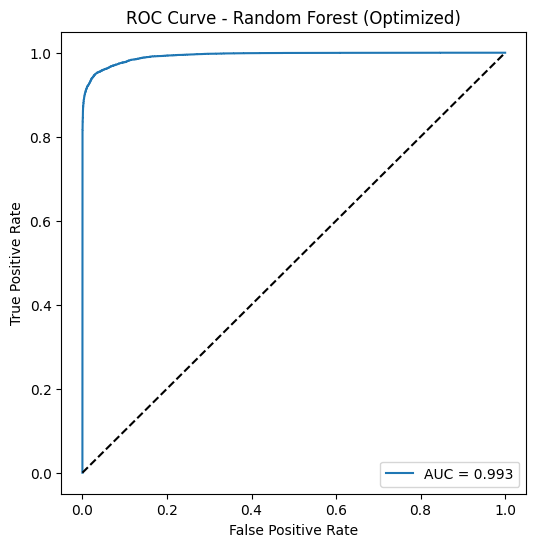


Top 20 features by permutation importance:
                                   feature  perm_mean  perm_std
18                            Seat comfort   0.188717  0.000558
23                  Inflight entertainment   0.090957  0.002010
17                          Type of Travel   0.030867  0.000658
28                        Baggage handling   0.030350  0.000969
24                          Online support   0.030118  0.000801
29                         Checkin service   0.029995  0.001035
30                             Cleanliness   0.027871  0.000205
31                         Online boarding   0.026751  0.000979
20                          Food and drink   0.024851  0.000786
13  Loyalty_Class_Loyal Customer__Business   0.019870  0.000408
25                  Ease of Online booking   0.017476  0.000471
16                           Customer Type   0.015005  0.000531
21                           Gate location   0.013437  0.000430
19       Departure/Arrival time convenient   0.012827  0.000

<Figure size 800x600 with 0 Axes>

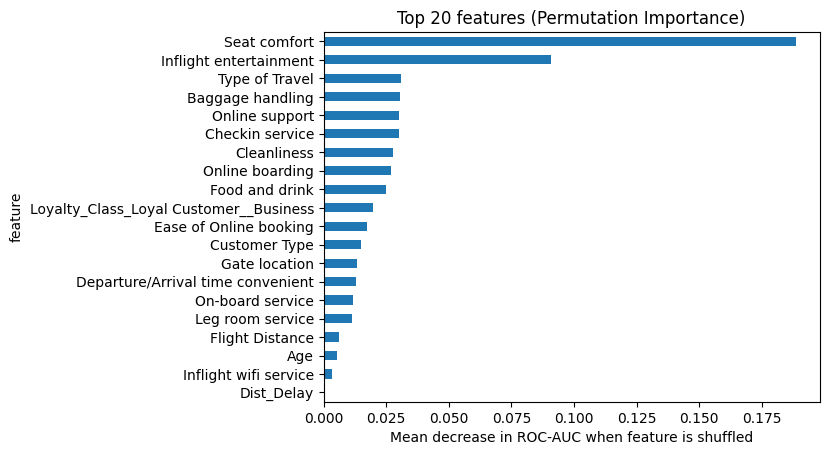

In [21]:
# RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance

  # Preparation
X_train_rf = pd.DataFrame(X_train_final, columns=feature_names_final)
X_test_rf  = pd.DataFrame(X_test_final, columns=feature_names_final)
y_train_rf = y_train.reset_index(drop=True)
y_test_rf  = y_test.reset_index(drop=True)
features = list(X_train_rf.columns)

  # Hyperparameter Tuning
subset_frac = 0.20
X_sub, _, y_sub, _ = train_test_split(
    X_train_rf, y_train_rf,
    train_size=subset_frac,
    stratify=y_train_rf,
    random_state=42
)
print(f"Tuning on subset: {X_sub.shape[0]} rows ({subset_frac*100:.0f}% of training)")

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 50],
    'min_samples_leaf': [1, 5, 20],
    'max_features': ['sqrt', 0.5, None]
}

rand_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rand_search.fit(X_sub, y_sub)
print("Best hyperparameters (RandomizedSearch):", rand_search.best_params_)

  # Model Training
best_rf = RandomForestClassifier(**rand_search.best_params_, random_state=42, n_jobs=-1)
best_rf.fit(X_train_rf, y_train_rf)
print("Refit best RandomForest on full training data.")

  # Predictions
y_pred = best_rf.predict(X_test_rf)
y_proba = best_rf.predict_proba(X_test_rf)[:, 1]

  # Evaluation Metrics
print("\nRANDOM FOREST RESULTS (OPTIMIZED)")
print("---------------------------------")
print("Accuracy:", accuracy_score(y_test_rf, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test_rf, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_rf, y_pred))
print("\nClassification Report:\n", classification_report(y_test_rf, y_pred))

    # ROC Curve
fpr, tpr, _ = roc_curve(y_test_rf, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_rf, y_proba):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Optimized)")
plt.legend()
plt.show()

  # Permutation Importance
perm = permutation_importance(best_rf, X_test_rf, y_test_rf, n_repeats=5, random_state=42, n_jobs=-1)
perm_df = pd.DataFrame({
    'feature': features,
    'perm_mean': perm.importances_mean,
    'perm_std': perm.importances_std
}).sort_values('perm_mean', ascending=False)

print("\nTop 20 features by permutation importance:")
print(perm_df.head(20))

plt.figure(figsize=(8,6))
perm_df.head(20).plot.barh(x='feature', y='perm_mean', legend=False)
plt.gca().invert_yaxis()
plt.title("Top 20 features (Permutation Importance)")
plt.xlabel("Mean decrease in ROC-AUC when feature is shuffled")
plt.show()

The Random Forest Model has the following results:
*   Accuracy: 95.81%
*   ROC-AUC: 0.99
*   Precision & Recall: Both types of errors (FP & FN) are low, it means that the model is reliable for operational use.

Note: Can still be improved by running a gradient boosting ensemble method and compare if it's better. This model can also be improved by increasing grid search size

# **VI. Model Evaluation**

**VI.i. Evaluation Metrics**


1. Accuracy - Measures percentage of overall correct predictions.
2. ROC-AUC - The model's ability to distinguish between 0 and 1. Values that are closer to 1 are better.
3. Precision - Out of all passengers who were predicted as satisfied by the model, how many of them are actually satisfied. Not that important in our case.
4. Recall - Out of all passengers who were actually satisfied, how many did the model correctly identify as such. More important for us since we want to identify satisfied customers for marketing and promotions.
5. F1-Score - Balanced measure of precision & recall. Useful for slightly imbalanced classes (~52/48%).

**VI.ii. Model Comparisons**

Table 1. Shows summary of evaluation metrics for each model.

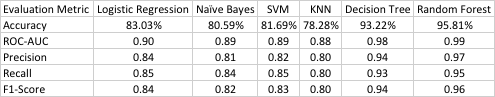

From these we can clearly say that the Random Forest Model is the best performing one because:
*   Highest Accuracy and ROC-AUC
*   Strong and balanced precision and recall
*   Feature Importance is easily interpretable
*   Ensembling makes the model robust to outliers, interactions, and noise.


# **VII. Results and Conclusion**

**VII.i. Results**

The Random Forest Model will be used in predicting
 (with ~96% accuracy) whether Gisma Air's Passengers will be satisfied or not.

 The model also suggests the top 5 most important feature in predicting passenger satisfaction: seat comfort, inflight entertainment, either business/personal travel, baggage handling, and online support. From these we can say that to boost satisfaction the focus should be on operational (in-flight) services rather than flight delays.


In terms of the models, there are still room for improvement, specifically, given more time would have allowed for more optimized hyperparameter tuning, cross-validation with more folds, and use approaches that takes longer (ie. RDF on SVM, Gradient Boosting)

**VII.ii. Business/Actionable Insights**

Here are some business insights that you can recommend to Gisma Air based on the information gained from the data that are therefore, reliable and actionable:

*   Improve passenger comfort and experience during the flight. Such as more comfortable chairs, wider array of inflight entertainment, better food quality and inflight services
*   Improve operational efficiency that can be directly felt by the passenger. Such as baggage handling, check-in and online customer service, and cleanliness of the aircraft.
*   You can also tailor services depending on passenger type and use customer segmentation to make an almost personalized communication.


# **VII. References**

Dataset:

https://www.kaggle.com/datasets/raminhuseyn/airline-customer-satisfaction/data


Forecast of Aviation industy after pandemic:

Gudmundsson SV., Cattaneo M., & Redondi R. (2020). “Forecasting temporal world recovery in air transport markets in the presence of large economic shocks: The case of COVID-19”. National Library of Medicine.


Actual State of Aviation industry after pandemic:

https://www.iata.org/en/pressroom/2024-releases/2024-01-31-02/?utm_source=chatgpt.com


Age groups:

https://www.mckinsey.com/industries/travel/our-insights/the-way-we-travel-now


Flight distance:

https://support.mybreeze.io/article/27-defining-short-medium-and-long-haul-flights-for-air-transport.     